In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

In [9]:
#remove instances where individuals reported having taken Semer, a fictional drug
df = df[df.Semer == 'CL0']

In [10]:
arr = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
# Collapse values into never used = 0 and have used = 1, include drug name for label when OHE
for i in range(0,18):
    df[arr[i]].replace({"CL0": 0, "CL1": 1, "CL2": 1, "CL3": 1, "CL4": 1, "CL5": 1, "CL6": 1}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from enum import IntEnum

X = df[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]
y_cols = ["Alcohol", "Amphet", "Cannabis", "Coke", "Ecstasy", "LSD", "Meth", "Mushrooms"]
y_enum = IntEnum("cols", y_cols, start = 0)
y = df[["Alcohol", "Amphet", "Cannabis", "Coke", "Ecstasy", "LSD", "Meth", "Mushrooms"]]

# def one_hot_encoding(df, col):
#     # one-hot encoding to represent classes
#     myData_encoder = LabelEncoder()
#     myData_encoded =  myData_encoder.fit_transform(df[col]) 

#     # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type

#     # reshape the array
#     myData_encoded = myData_encoded.reshape(len(myData_encoded), 1) 
#     onehot_encoded = onehot_encoder.fit_transform(myData_encoded) 
#     #print(onehot_encoded)
#     # convert ndarrary of encodings to dataframe using myData_encoder.classes_ as column names
#     return(pd.DataFrame(onehot_encoded, columns = myData_encoder.classes_))

# for col_name in y_cols:
#     #one-hot encode every y_col
#     y[y_enum[col_name].value] = one_hot_encoding(df, col_name)

## GRID SEARCH:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

model_params = [None] * len(y_cols) #list of model parameters in y_cols order

#pass inputs X and target y
#returns dictionary of best params for hidden_layer_sizes and learning_rate_init
def search(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

    clf = MLPClassifier(hidden_layer_sizes=(32, 24, 12), learning_rate_init = 0.1, activation="logistic",solver = 'sgd', max_iter = 1000, random_state=1)

    # Grid Search
    hidden_layer_sizes = [(45, 36), (60, 45), (32, 24, 12), (60, 45, 24)]
    learning_rate_init = [0.1, 0.2, 0.3, 0.4]
    param_grid = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init)
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    # summarize results - this code was taken from a lecture example
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return grid_result.best_params_

for drug in y_cols:
    print(drug)
    model_params[y_enum[drug].value] = search(X, y[drug])
    

Alcohol
Best: 0.981347 using {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.1}
0.981347 (0.000924) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.1}
0.981347 (0.000924) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.2}
0.981347 (0.000924) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.3}
0.981347 (0.000924) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.4}
0.981347 (0.000924) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.1}
0.981347 (0.000924) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.2}
0.981347 (0.000924) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.3}
0.981347 (0.000924) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.4}
0.981347 (0.000924) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.1}
0.981347 (0.000924) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.2}
0.981347 (0.000924) with: {'hidden_layer_si

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.618896 using {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.2}
0.602226 (0.062244) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.1}
0.606896 (0.052684) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.2}
0.581564 (0.056872) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.3}
0.602233 (0.061132) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.4}
0.606222 (0.065014) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.1}
0.618896 (0.036250) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.2}
0.618226 (0.072630) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.3}
0.557635 (0.039118) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.4}
0.494323 (0.014599) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.1}
0.494323 (0.014599) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.2}
0.539566 (0.078582) with: {'hidden_layer_sizes': (3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.768149 using {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.2}
0.726152 (0.038583) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.1}
0.761485 (0.007757) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.2}
0.760154 (0.005875) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.3}
0.717530 (0.027684) with: {'hidden_layer_sizes': (45, 36), 'learning_rate_init': 0.4}
0.763484 (0.007925) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.1}
0.768149 (0.008780) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.2}
0.762816 (0.009639) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.3}
0.762816 (0.009639) with: {'hidden_layer_sizes': (60, 45), 'learning_rate_init': 0.4}
0.756162 (0.000230) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.1}
0.762150 (0.008698) with: {'hidden_layer_sizes': (32, 24, 12), 'learning_rate_init': 0.2}
0.758824 (0.003993) with: {'hidden_layer_sizes': (3

***USE THESE MODELS***

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, confusion_matrix


models = [None] * len(y_cols) #list of models in y_cols order
conf_matrices = []  # List of of confusion matrices, one for each substance

#pass inputs X and target y with hyperparams hidden_layer_sizes and learning_rate_init
#returns trained model
def train(X, y, hidden_layer_sizes, learning_rate_init):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init = learning_rate_init, activation="logistic",solver = 'sgd', max_iter = 1000, random_state=1)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test) 

    #accuracy and MSE
    print('\nModel Accuracy:', clf.score(X_test, y_test))
    print('Model MSE:', mean_squared_error(y_test, y_pred))
    print('Model Precision:', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall:', recall_score(y_test, y_pred, average='micro'), '\n')
    
    return clf, confusion_matrix(y_test, y_pred)

for drug, params in zip(y_cols, model_params):
    print(drug)
    #use parameters from gridsearch to train models
    models[y_enum[drug].value], c_f = train(X, y[drug], params['hidden_layer_sizes'], params['learning_rate_init'])
    conf_matrices.append(c_f)


Alcohol

Model Accuracy: 0.9867021276595744
Model MSE: 0.013297872340425532
Model Precision: 0.9867021276595744
Model Recall: 0.9867021276595744 

Amphet

Model Accuracy: 0.6675531914893617
Model MSE: 0.3324468085106383
Model Precision: 0.6675531914893617
Model Recall: 0.6675531914893617 

Cannabis

Model Accuracy: 0.8351063829787234
Model MSE: 0.16489361702127658
Model Precision: 0.8351063829787234
Model Recall: 0.8351063829787234 

Coke

Model Accuracy: 0.6063829787234043
Model MSE: 0.39361702127659576
Model Precision: 0.6063829787234043
Model Recall: 0.6063829787234043 

Ecstasy

Model Accuracy: 0.6648936170212766
Model MSE: 0.3351063829787234
Model Precision: 0.6648936170212766
Model Recall: 0.6648936170212766 

LSD

Model Accuracy: 0.675531914893617
Model MSE: 0.324468085106383
Model Precision: 0.675531914893617
Model Recall: 0.675531914893617 

Meth

Model Accuracy: 0.7606382978723404
Model MSE: 0.2393617021276596
Model Precision: 0.7606382978723404
Model Recall: 0.76063829787234

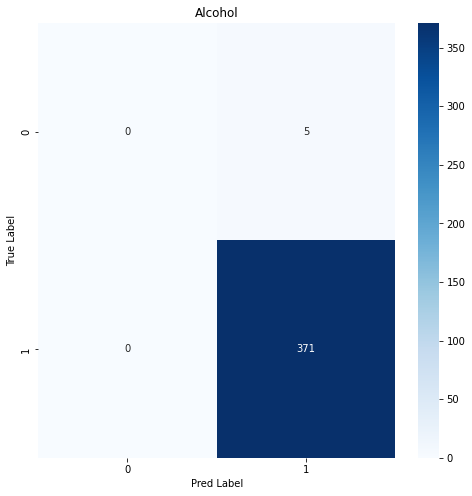

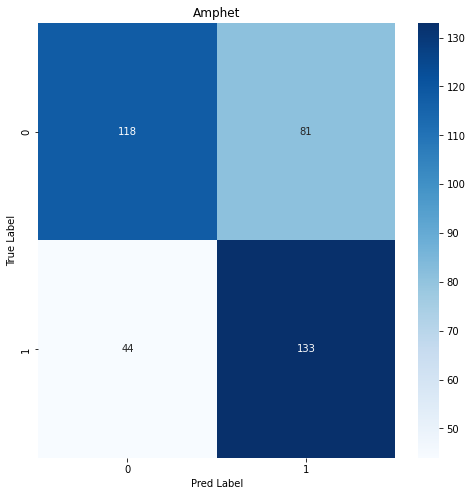

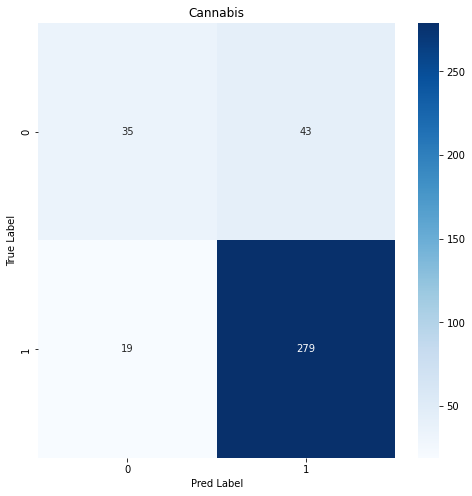

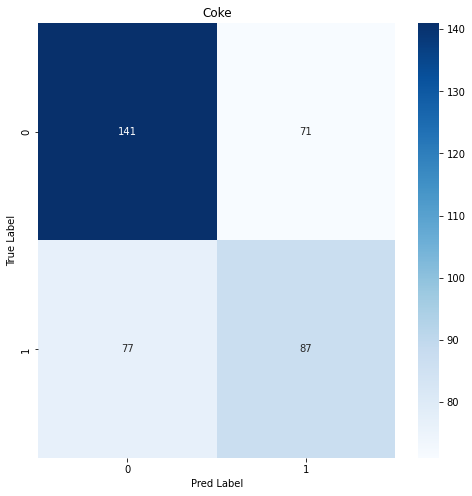

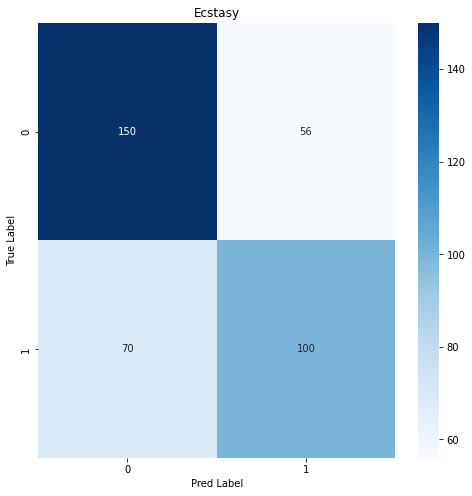

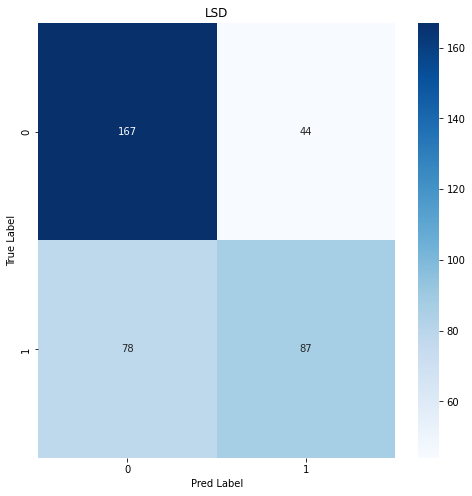

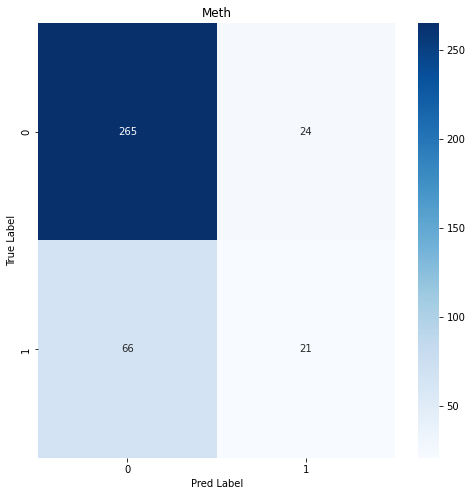

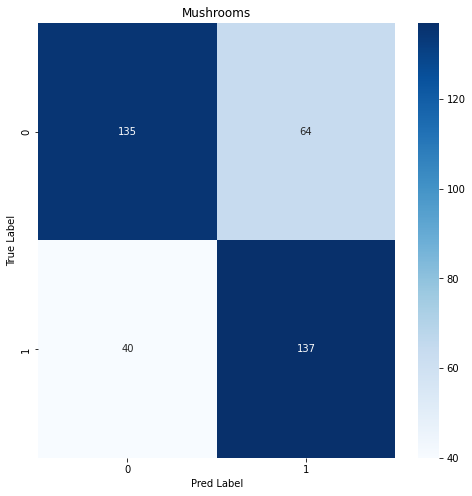

In [14]:
for i, m in enumerate(conf_matrices):
    fig, ax = plt.subplots(figsize=(8,8))
    fig = sns.heatmap(m, annot=True, cmap="Blues", fmt='g', ax=ax)
    fig.set_title(y_cols[i])
    fig.set_ylabel("True Label")
    fig.set_yticklabels(["0", "1"])
    fig.set_xlabel("Pred Label")
    fig.set_xticklabels(["0", "1"])

In [15]:
from joblib import dump, load
names = list(range(1, 9))

for model, name in zip(models, names):
    dump(model,'./personalityModels/PersonalityModel'+str(name)+'.joblib')